In [1]:
%pylab inline
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/project/FLASH4.3_3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


In [12]:
yt.mylog.setLevel(50)

In [3]:
import yt
from yt.units import second, g, cm ,dyne
G = 6.674e-8*cm**3/second**2/g
ctr = 5e18*cm

In [7]:
def plot_var(i,physical_quantity,velocity=False,grid=False,zmin ="",zmax="",particle=False):
    ds = yt.load("mhd_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    slc.show()

# With HLLC solver 

In [5]:
cd ../mhd_nosink/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/mhd_nosink



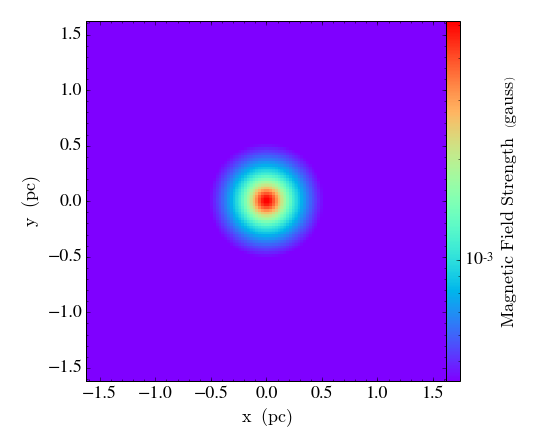

In [10]:
plot_var(0,'magnetic_field_strength')


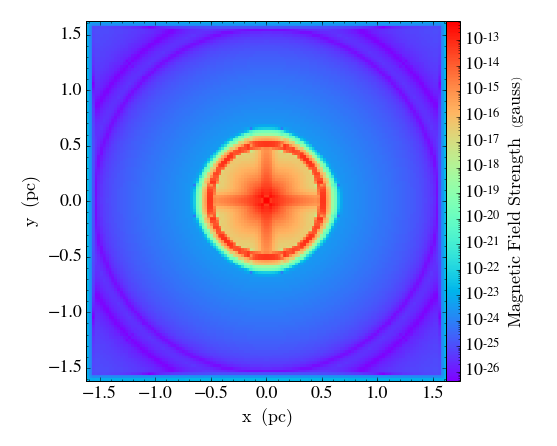

In [9]:
plot_var(1,'magnetic_field_strength')

# With the HLLD solver instead

In [10]:
cd ../object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object



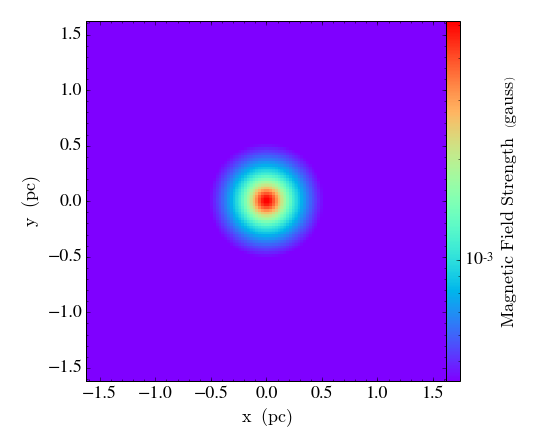

In [13]:
plot_var(0,'magnetic_field_strength')


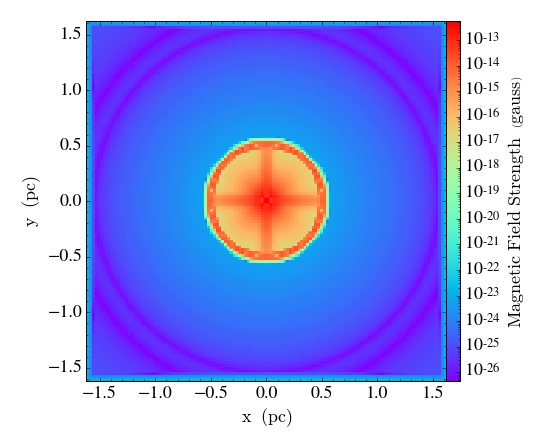

In [14]:
plot_var(1,'magnetic_field_strength')

In [17]:
i= 0 
ds = yt.load("mhd_sphere_hdf5_chk_{}".format(str(i).zfill(4)))

In [16]:
def _B_mag(field,data):
    return sqrt(data['magnetic_field_x']**2+data['magnetic_field_y']**2+data['magnetic_field_z']**2)
yt.add_field("B_mag",function= _B_mag,units="g**0.5/(cm**0.5*s)")


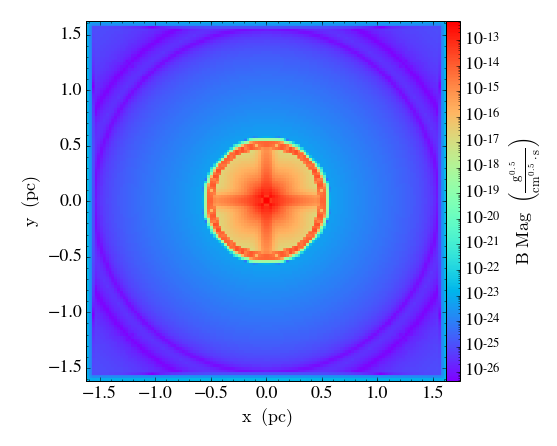

In [17]:
plot_var(1,"B_mag")

In [28]:
cd ../object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


In [40]:
def plot_var(i,physical_quantity,velocity=False,grid=False,zmin ="",zmax="",particle=False):
    ds = yt.load("torus_mhd_2d_hdf5_chk_{}".format(str(i).zfill(4)))
    #slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc = yt.ProjectionPlot(ds,physical_quantity)
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    slc.show()


# MHD_Torus 

In [56]:
cd ../torus/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/torus


In [80]:
from yt.visualization.fixed_resolution import FixedResolutionBuffer

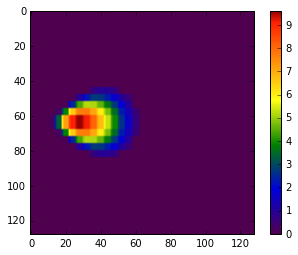

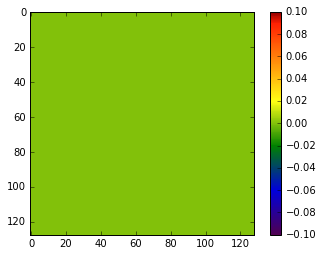

In [153]:
i=1
ds = yt.load("torus_mhd_2d_hdf5_chk_{}".format(str(i).zfill(4)))
xdir=0
ydir=1
slicedirection=2
sl = ds.slice(slicedirection,0) ##Get the Slice
w = [ds.domain_left_edge[xdir],ds.domain_right_edge[xdir],ds.domain_left_edge[ydir],ds.domain_right_edge[ydir]] 
frb1 = FixedResolutionBuffer(sl,w,(128,128))  #Create FixedResolution Buffer

plt.figure()
plt.imshow(np.array(frb1["density"]))
plt.colorbar()
plt.figure()
plt.imshow(np.array(frb1["magnetic_field_strength"]))
plt.colorbar()

In [154]:
def plot_stuff(i):
    ds = yt.load("torus_mhd_2d_hdf5_chk_{}".format(str(i).zfill(4)))
    xdir=0
    ydir=1
    slicedirection=2
    sl = ds.slice(slicedirection,0) ##Get the Slice
    w = [ds.domain_left_edge[xdir],ds.domain_right_edge[xdir],ds.domain_left_edge[ydir],ds.domain_right_edge[ydir]] 
    frb1 = FixedResolutionBuffer(sl,w,(128,128))  #Create FixedResolution Buffer

    plt.figure()
    plt.imshow(np.array(frb1["density"]))
    plt.colorbar()
    plt.figure()
    plt.imshow(np.array(frb1["magnetic_field_strength"]))
    plt.colorbar()

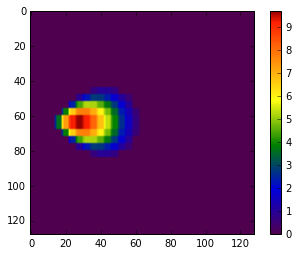

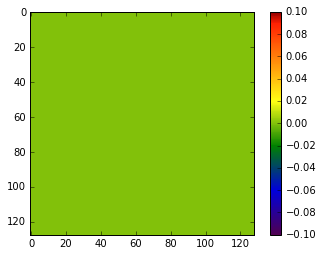

In [155]:
plot_stuff(0)

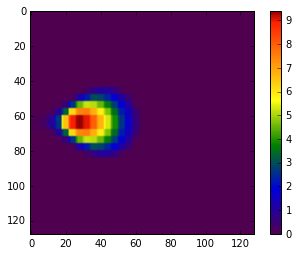

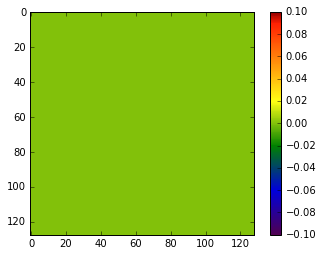

In [157]:
plot_stuff(7)

### Amp up the refinement 

In [15]:
cd ../../scratch2/scratchdirs/dorislee

[Errno 2] No such file or directory: '../../scratch2/scratchdirs/dorislee'
/global/u2/d/dorislee


In [158]:
plot_stuff(0)

Traceback (most recent call last):
  File "/anaconda2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1120, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/anaconda2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 301, in wrapped
    return f(*args, **kwargs)
  File "/anaconda2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 346, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/anaconda2/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/anaconda2/lib/python2.7/inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/anaconda2/lib/python2.7/inspect.py", line 454, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File "/anaconda2/lib/python2.7/inspect.py", line 483, in getmodule
    file 

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.


Unfortunately, your original traceback can not be constructed.



IndexError: string index out of range